In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# Changepoint Quantification

An analysis of the change in trend before and after a change point has occurred within GDP per hour worked. Focussing on change points caused by the 2008 housing crisis. This will be done by looking specifically at the 2 years preceding and following the changepoint.

## All countries averaged

In [2]:
# Import Data
dataDirectory = "../Datasets/cleaned_Productivity.csv"
rawData = pd.read_csv(dataDirectory, header=0, nrows=None)
headers = list(rawData)
rawData = np.array(rawData)
countries = rawData[:,0]

In [3]:
# Trim to desired years
beginIndex = 6
endIndex = 11
rawData = rawData[:, beginIndex:endIndex]
headers = headers[beginIndex:endIndex]

Text(0.5, 0, 'Year')

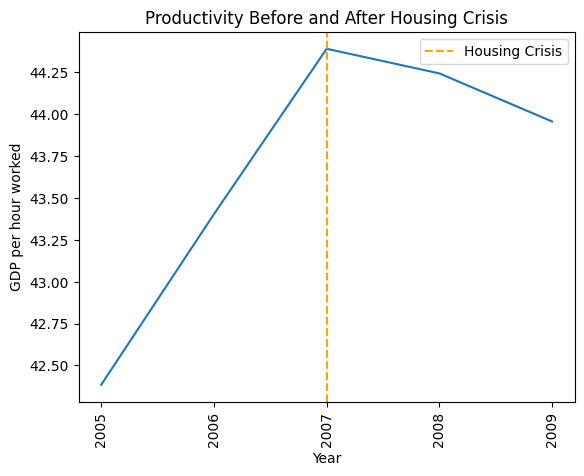

In [4]:
# Generate average productivity for each year
averageProd = np.mean(rawData, axis=0)
plt.plot(averageProd, label=None)
plt.xticks(ticks=np.arange(0, len(headers)), labels=headers, rotation=90)
plt.axvline(x=2, c='orange', linestyle='dashed', label="Housing Crisis")
plt.legend()
plt.title("Productivity Before and After Housing Crisis")
plt.ylabel("GDP per hour worked")
plt.xlabel("Year")

In [5]:
changes = np.diff(averageProd)
averageChangeBefore = np.mean(changes[:2])
averageChangeAfter = np.mean(changes[2:])
print(f'The average change before the crisis is {averageChangeBefore}.')
print(f'The average change after the crisis is {averageChangeAfter}.')

The average change before the crisis is 1.0025520697674501.
The average change after the crisis is -0.21698759302325143.


## Countries Individually

Text(0.5, 0, 'Year')

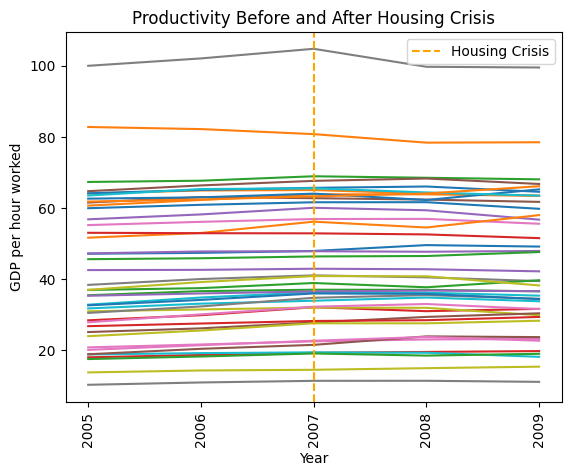

In [6]:
plt.plot(rawData.T, label=None)
plt.xticks(ticks=np.arange(0, len(headers)), labels=headers, rotation=90)
plt.axvline(x=2, c='orange', linestyle='dashed', label="Housing Crisis")
plt.legend()
plt.title("Productivity Before and After Housing Crisis")
plt.ylabel("GDP per hour worked")
plt.xlabel("Year")

In [7]:
changes = np.diff(rawData, axis=1)
averageChangeBefore = np.mean(changes[:, :2], axis=1)
averageChangeAfter = np.mean(changes[:, 2:], axis=1)
acceleration = averageChangeAfter - averageChangeBefore

# Sort acceleration and countries together
bothArrays = np.stack((countries, acceleration))
bothArrays = bothArrays[:, bothArrays[1, :].argsort()]
countries = bothArrays[0]
acceleration = bothArrays[1]

In [8]:
Australia = 'AUS'
Austria = 'AUT'
Belgium = 'BEL'
Bulgaria = 'BGR'
Canada = 'CAN'
Switzerland = 'CHE'
Chile = 'CHL'
Colombia = 'COL'
CostaRica = 'CRI'
CzechRepublic = 'CZE'
Germany = 'DEU'
Denmark = 'DNK'
Spain = 'ESP'
Estonia = 'EST'
Finland = 'FIN'
France = 'FRA'
UnitedKingdom = 'GBR'
Greece = 'GRC'
Croatia = 'HRV'
Hungary = 'HUN'
Ireland = 'IRL'
Iceland = 'ISL'
Israel = 'ISR'
Italy = 'ITA'
Japan = 'JPN'
Korea = 'KOR'
Lithuania = 'LTU'
Luxembourg = 'LUX'
Latvia = 'LVA'
Mexico = 'MEX'
Netherlands = 'NLD'
Norway = 'NOR'
NewZealand = 'NZL'
Poland = 'POL'
Portugal = 'PRT'
Romania = 'ROU'
Russia = 'RUS'
Slovakia = 'SVK'
Slovenia = 'SVN'
Sweden = 'SWE'
Turkey = 'TUR'
UnitedStates = 'USA'
SouthAfrica = 'ZAF'

# accordignly to https://www.cia.gov/the-world-factbook/field/location/

CentralEurope = [Austria, CzechRepublic, Germany, Hungary, Poland, Slovakia, Slovenia, Switzerland]
EasternEurope = [Estonia, Latvia, Lithuania]
NorthernEurope = [Denmark, Finland, Norway, Sweden, Iceland]
SouthEasternEurope = [Bulgaria, Croatia, Romania, Turkey]
SouthernEurope = [Greece, Italy]
SouthWesternEurope = [Portugal, Spain]
WesternEurope = [Belgium, France, Ireland, Luxembourg, Netherlands, UnitedKingdom]

Europe = [CentralEurope, EasternEurope, NorthernEurope, SouthEasternEurope, SouthernEurope, SouthWesternEurope, WesternEurope]
EuropeFlat =  [country for subregion in Europe for country in subregion]

In [9]:
colour = []
for country in countries:
    if country in EuropeFlat:
        colour.append('Blue')
    else:
        colour.append('Red')

/tmp/ipykernel_6175/551746772.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(countries, rotation=90)


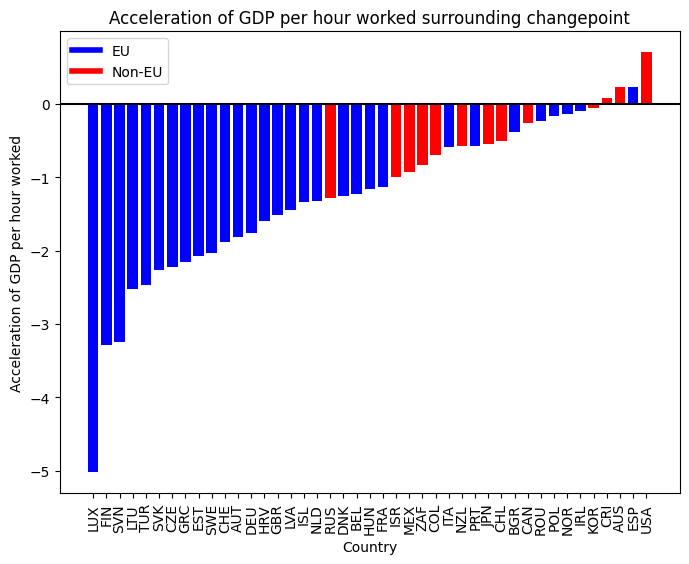

In [10]:
custom_lines = [Line2D([0], [0], color='Blue', lw=4),
                Line2D([0], [0], color='Red', lw=4)]

_, ax = plt.subplots(figsize=(8, 6))
ax.bar(countries, acceleration, color=colour)
ax.set_xticklabels(countries, rotation=90)
ax.set_title("Acceleration of GDP per hour worked surrounding changepoint")
ax.set_ylabel("Acceleration of GDP per hour worked")
ax.set_xlabel("Country")
ax.axhline(0, color='black')
ax.legend(custom_lines, ['EU', 'Non-EU'])

Remove non-EU countries and colour based on europe region

In [11]:
EUCountries = np.array(countries)
EUAcceleration = np.array(acceleration)

In [12]:
EUColour = []
Europe = [CentralEurope, EasternEurope, NorthernEurope, SouthEasternEurope, SouthernEurope, SouthWesternEurope, WesternEurope]
for country in EUCountries:
    if country in CentralEurope:
        EUColour.append('Blue')
    elif country in EasternEurope:
        EUColour.append('Black')
    elif country in NorthernEurope:
        EUColour.append('Orange')
    elif country in SouthernEurope:
        EUColour.append('Green')
    elif country in SouthEasternEurope:
        EUColour.append('Purple')
    elif country in SouthWesternEurope:
        EUColour.append('Yellow')
    elif country in WesternEurope:
        EUColour.append('Pink')
    else:
        EUColour.append('Red')

/tmp/ipykernel_6175/2407262385.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(countries, rotation=90)


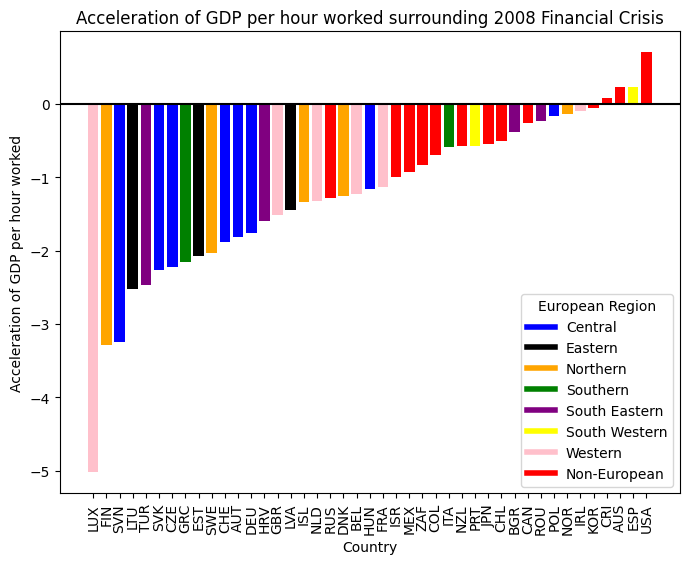

In [13]:
custom_lines = [Line2D([0], [0], color='Blue', lw=4),
                Line2D([0], [0], color='Black', lw=4),
                Line2D([0], [0], color='Orange', lw=4),
                Line2D([0], [0], color='Green', lw=4),
                Line2D([0], [0], color='Purple', lw=4),
                Line2D([0], [0], color='Yellow', lw=4),
                Line2D([0], [0], color='Pink', lw=4),
                Line2D([0], [0], color='Red', lw=4),]

_, ax = plt.subplots(figsize=(8, 6))
ax.bar(EUCountries, EUAcceleration, color=EUColour)
ax.set_xticklabels(countries, rotation=90)
ax.set_title("Acceleration of GDP per hour worked surrounding 2008 Financial Crisis")
ax.set_ylabel("Acceleration of GDP per hour worked")
ax.set_xlabel("Country")
ax.axhline(0, color='black')
ax.legend(custom_lines, ['Central', 'Eastern', 'Northern', 'Southern', 'South Eastern', 'South Western', 'Western', 'Non-European'], title='European Region')

In [14]:
aveRankRegion = np.zeros(7)
for i, country in enumerate(EUCountries):
    if country in CentralEurope:
        aveRankRegion[0] += len(EUCountries) - i
    elif country in EasternEurope:
        aveRankRegion[1] += len(EUCountries) - i
    elif country in NorthernEurope:
        aveRankRegion[2] += len(EUCountries) - i
    elif country in SouthernEurope:
        aveRankRegion[3] += len(EUCountries) - i
    elif country in SouthEasternEurope:
        aveRankRegion[4] += len(EUCountries) - i
    elif country in SouthWesternEurope:
        aveRankRegion[5] += len(EUCountries) - i
    elif country in WesternEurope:
        aveRankRegion[6] += len(EUCountries) - i

aveRankRegion[0] /= len(CentralEurope)
aveRankRegion[1] /= len(EasternEurope)
aveRankRegion[2] /= len(NorthernEurope)
aveRankRegion[3] /= len(SouthernEurope)
aveRankRegion[4] /= len(SouthEasternEurope)
aveRankRegion[5] /= len(SouthWesternEurope)
aveRankRegion[6] /= len(WesternEurope)

regions = ['Central', 'Eastern', 'Northern', 'Southern', 'South Eastern', 'South Western', 'Western']
for i, aveRank in enumerate(aveRankRegion):
    print(f'The Average Rank for {regions[i]} Europe is {round(aveRank,2)}')

The Average Rank for Central Europe is 30.25
The Average Rank for Eastern Europe is 34.33
The Average Rank for Northern Europe is 26.8
The Average Rank for Southern Europe is 26.0
The Average Rank for South Eastern Europe is 22.25
The Average Rank for South Western Europe is 8.0
The Average Rank for Western Europe is 24.67


In [15]:
dataDirectory = "../Datasets/ESI_Clean.csv" #LOAD ESI DATA
dataESI = pd.read_csv(dataDirectory, header=0, nrows=None)
dataESI = np.array(dataESI)

In [16]:
# Convert each month-year to year
for i, data in enumerate(dataESI[0]):
    dataESI[0][i] = data.split('-')[1]

# Remove '.ESI' from country code
for i, data in enumerate(dataESI[:,0]):
    dataESI[i][0] = data.split('.')[0]

yearAverage = np.zeros(dataESI.shape[0])
yearlyDataESI = np.zeros(dataESI.shape[1]-1).T
currentYear = ''
for i, year in enumerate(dataESI.T):
    if i == 0:
        continue

    if year[0] != currentYear:
        currentYear = year[0]
        yearAverage /= months
        yearlyDataESI = np.append(yearlyDataESI, yearAverage.T, axis=1)
        print(yearAverage)
        months = 1
    else:
        months += 1

    yearAverage += np.array(year).astype(float)

# Get the average  ESI for each year

NameError: name 'months' is not defined

In [ ]:
print(yearlyDataESI)